In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline

Example of loading a dataset from the file datasets.txt:

In [39]:
datasets = open("datasets.txt","r")
datasets = datasets.read().splitlines()
# remove blank lines
for line in datasets:
    if line=='':
        datasets.remove(line)
length = str(len(datasets))
select_dataset = int(input("Please select a dataset 1 - " + length +":"))
raw_current_dataset = datasets[select_dataset-1].split(",")
raw_current_dataset.pop(len(raw_current_dataset)-1)
current_dataset = [float(val) for val in raw_current_dataset]
current_dataset

[-0.17870235401657958,
 20.0,
 -0.18910293847464696,
 24.663,
 -0.1952621259568112,
 29.337,
 -0.1990873607095502,
 34.0,
 -0.20219550183318416,
 38.663,
 -0.20469441310067985,
 43.337,
 -0.20627193091146617,
 48.0,
 -0.208269594100261,
 52.663,
 -0.2092020620769698,
 57.337,
 -0.2101098600941466,
 62.0,
 -0.21134060592841888,
 66.663,
 -0.21163453485273945,
 71.337,
 -0.2126566070380387,
 76.0,
 -0.21333097747385574,
 80.663,
 -0.21387067760609482,
 85.337]

Split data into 2 separate lists:

In [40]:
distance, entropy = [], []
for i in range(len(current_dataset)):
    if i == 0 or i%2 == 0:
        entropy.append(current_dataset[i])
    else:
        distance.append(current_dataset[i])

Plot entropy against distance:

Text(0.5, 1.0, 'Plot of entropy against distance')

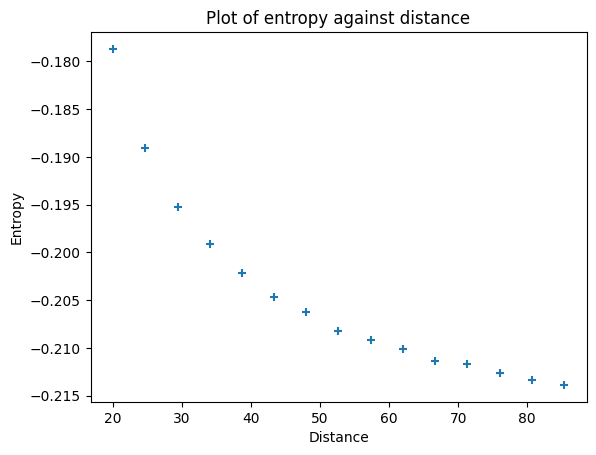

In [41]:
plt.scatter(distance,entropy,marker='+')
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Plot of entropy against distance")

Plot gradient against distance:

In [42]:
x_values,y_values = [],[]
for i in range(0,len(current_dataset),2):
    x_values.append(current_dataset[i+1])
    y_values.append(current_dataset[i])

In [43]:
p = np.polyfit(x_values,y_values,3)
p

array([-2.63032845e-07,  5.19913667e-05, -3.53245045e-03, -1.28367863e-01])

Text(0.5, 1.0, 'Fitting a polynomial curve')

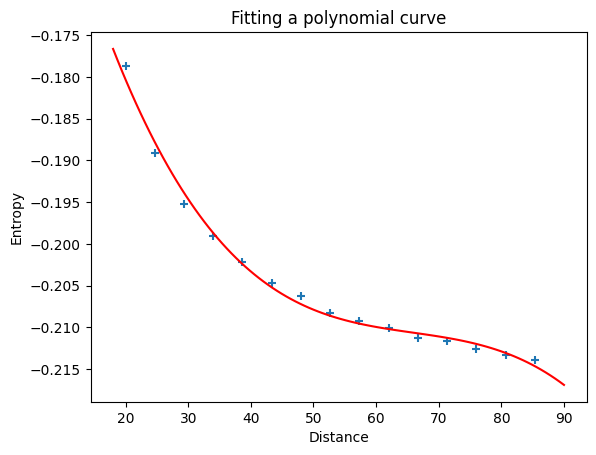

In [44]:
x = np.linspace(18,90,100)
y = (p[0] * x**3) + (p[1] * x**2) + (p[2] * x) + p[3]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting a polynomial curve")

In [45]:
def f(x, a, b, c):
    return (a*(x**b)) + c

p2 = scipy.optimize.curve_fit(f, xdata=x_values,ydata=y_values, p0=(0,-1,2))
p2 = p2[0]
p2

array([ 1.88570736, -1.27813423, -0.22000532])

Text(0.5, 1.0, 'Fitting an exponential curve')

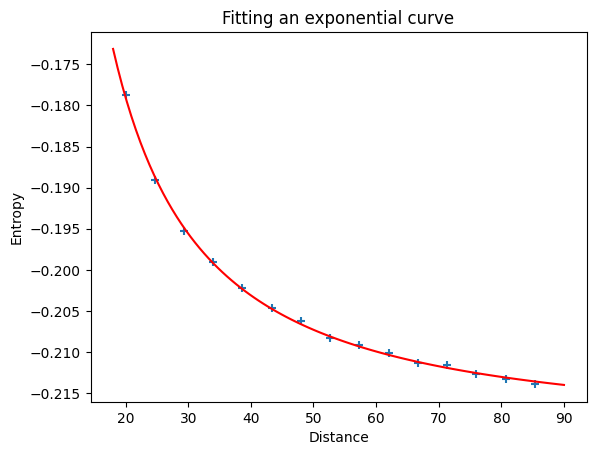

In [46]:
y2 = (p2[0] * (x**p2[1])) + p2[2]

plt.scatter(distance,entropy,marker='+')
plt.plot(x,y2,"red")
plt.xlabel("Distance")
plt.ylabel("Entropy")
plt.title("Fitting an exponential curve")

Calculate gradient between points and graph

In [47]:
gradient_vals = []

for i in range(len(entropy)-1):
    dS = entropy[i+1] - entropy[i]
    dx = distance[i+1] - distance[i]
    x = distance[i] + dx/2
    gradient_vals.append((dS/dx,x))


Text(0.5, 1.0, 'Plotting dS/dx against distance(x)')

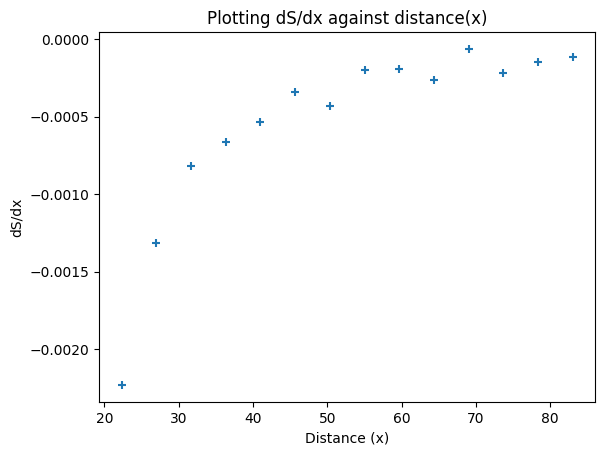

In [48]:
grad_xs, grad_ys = [],[]
for coord in gradient_vals:
    grad_ys.append(coord[0])
    grad_xs.append(coord[1])
#grad_xs.pop(0)
#grad_ys.pop(0)
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Plotting dS/dx against distance(x)")

a = 0.00045729131522796165 
b = -21.836220571488003 
c = -0.0019169308891375735


C:\Users\Josh\AppData\Local\Temp\ipykernel_5804\379707339.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(x+b) + c
C:\Users\Josh\AppData\Local\Temp\ipykernel_5804\379707339.py:9: RuntimeWarning: invalid value encountered in log
  y3 = (p3[0] * np.log(x+p3[1])) + p3[2]


Text(0.5, 1.0, 'Fitting a log curve to the data')

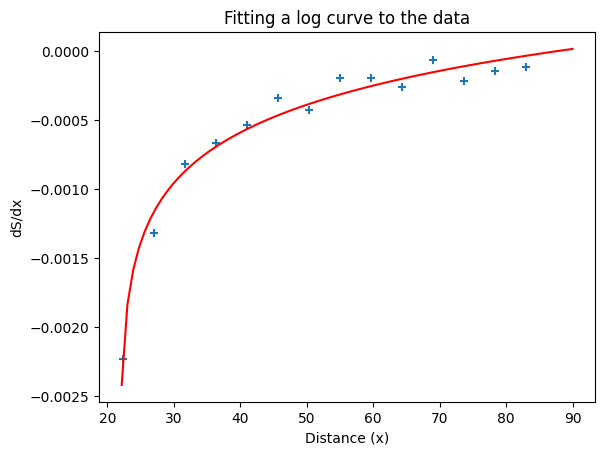

In [49]:
def f(x, a, b, c):
    return a * np.log(x+b) + c

p3 = scipy.optimize.curve_fit(f, xdata=grad_xs,ydata=grad_ys, p0=(0.001,-5,-0.005))[0]
print("a =",p3[0],"\nb =",p3[1],"\nc =",p3[2])

x = np.linspace(5,90,100)

y3 = (p3[0] * np.log(x+p3[1])) + p3[2]

plt.plot(x,y3,"red")
plt.scatter(grad_xs,grad_ys,marker="+")
plt.xlabel("Distance (x)")
plt.ylabel("dS/dx")
plt.title("Fitting a log curve to the data")

In [50]:
neg_log_grads = []
log_xs = []

for y in grad_ys:
    neg_log_grads.append(np.log(-1 * y))
for x in grad_xs:
    log_xs.append(np.log(x))

Text(0.5, 1.0, 'ln-ln plot of data')

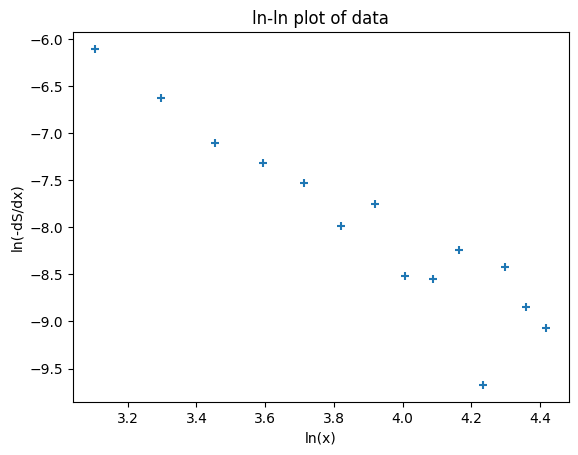

In [51]:
plt.scatter(log_xs,neg_log_grads,marker="+")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("ln-ln plot of data")

In [52]:
# could remove outliers here
p4 = np.polyfit(log_xs,neg_log_grads,1)
p4

array([-2.23538399,  0.71632056])

Text(0.5, 1.0, 'Plotting linear LOBF')

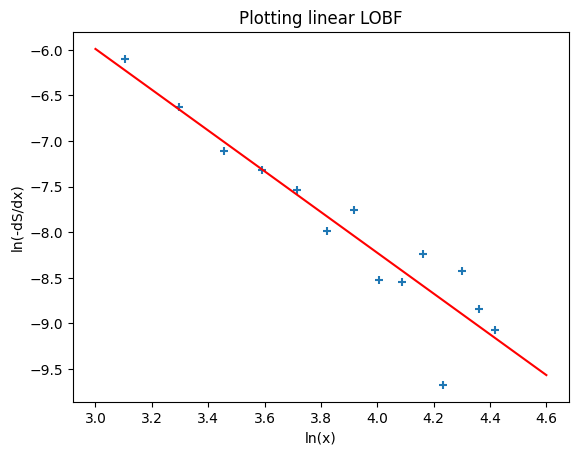

In [53]:
x = np.linspace(3.0,4.6,100)
y = p4[0] * x + p4[1]

plt.scatter(log_xs,neg_log_grads,marker="+")
plt.plot(x,y,"red")
plt.xlabel("ln(x)")
plt.ylabel("ln(-dS/dx)")
plt.title("Plotting linear LOBF")

In [54]:
print("The gradient of the ln-ln plot is %s"%round(p4[0],9))

The gradient of the ln-ln plot is -2.235383985


Text(0, 0.5, 'log(time taken (s))')

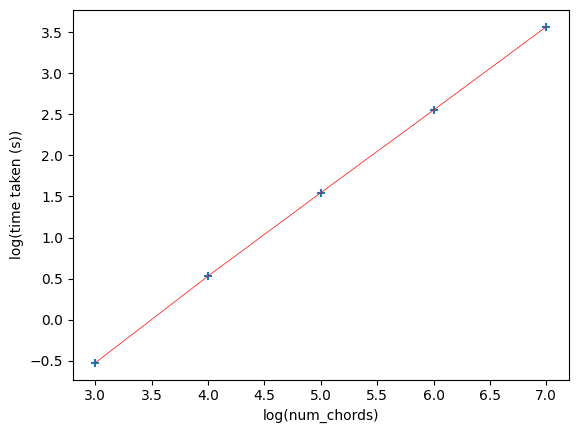

In [55]:
with open("vary_num_chords.txt") as chords_data:
    chords_data_list = chords_data.read().splitlines()
chords_x,chords_y = [],[]
for val in chords_data_list:
    chords_x.append(np.log10(int(val.split(",")[0])))
    chords_y.append(np.log10(float(val.split(",")[1])))

plt.scatter(chords_x,chords_y,marker="+")
plt.plot(chords_x,chords_y,"red",linewidth=0.5)
plt.xlabel("log(num_chords)")
plt.ylabel("log(time taken (s))")

# Ideas:

Graph multiple datasets or their LOBFs, calculate mean or median of them

Graph how long varying number of simulations (fix num_chords)

Remove outliers from gradient graph and try again

Graph the mathematical derivative of the curve fit values and compare